In [1]:
import sys
sys.path.append('../src')
import api_utils
import seaborn as sns

In [2]:
print(api_utils.get_currencies())

0      btc
1      eth
2      ltc
3      bch
4      bnb
      ... 
57     xdr
58     xag
59     xau
60    bits
61    sats
Length: 62, dtype: object


In [3]:
print(api_utils.get_coins())

                             id symbol                      name
0                             _    gib                ༼ つ ◕_◕ ༽つ
1                        01coin    zoc                    01coin
2                        0chain    zcn                       Zus
3                          0dog   0dog              Bitcoin Dogs
4           0-knowledge-network    0kn       0 Knowledge Network
...                         ...    ...                       ...
17123                  zynecoin    zyn                  Zynecoin
17124                    zyro-2   zyro                      ZYRO
17125                     zyrri    zyr                     Zyrri
17126                       zzz    zzz               GoSleep ZZZ
17127  z-z-z-z-z-fehu-z-z-z-z-z      ᚠ  Z•Z•Z•Z•Z•FEHU•Z•Z•Z•Z•Z

[17128 rows x 3 columns]


In [4]:
print(api_utils.get_sorted_by_mkt_cap())

            id symbol      name     market_cap  current_price
0      bitcoin    btc   Bitcoin  1649821897248       83092.98
1     ethereum    eth  Ethereum   216486657928        1793.59
2       tether   usdt    Tether   144015623568           1.00
3       ripple    xrp       XRP   117613743893           2.02
4  binancecoin    bnb       BNB    86641483519         593.65
5     usd-coin   usdc      USDC    60639315857           1.00
6       solana    sol    Solana    59445989738         115.97
7     dogecoin   doge  Dogecoin    23839447411           0.16
8      cardano    ada   Cardano    23075783897           0.64
9         tron    trx      TRON    21987915737           0.23


In [5]:
hist_data = api_utils.get_historical_data()
print(hist_data)

                  price    market_cap  total_volume
timestamp                                          
1712188800000  66123.94  1.301670e+12  3.555995e+10
1712275200000  68542.18  1.348456e+12  3.751685e+10
1712361600000  67978.61  1.337453e+12  3.513281e+10
1712448000000  69000.65  1.358549e+12  1.911944e+10
1712534400000  69401.97  1.367272e+12  1.793548e+10
...                 ...           ...           ...
1743292800000  82679.17  1.640666e+12  1.683744e+10
1743379200000  82356.38  1.633996e+12  1.342898e+10
1743465600000  82514.09  1.635077e+12  3.032615e+10
1743552000000  85237.59  1.690602e+12  2.917290e+10
1743638400000  82526.42  1.637359e+12  4.633291e+10

[365 rows x 3 columns]


In [6]:
ohlc_data = api_utils.get_ohlc_data()
print(ohlc_data)

                   open      high       low     close
timestamp                                            
1712102400000  69674.30  69674.30  64692.62  65440.42
1712448000000  65449.67  69576.85  64673.16  69000.65
1712793600000  68896.13  72631.62  67568.51  70527.89
1713139200000  70602.35  71220.95  61514.38  65752.66
1713484800000  65680.45  66797.95  60062.23  63461.59
...                 ...       ...       ...       ...
1742169600000  83678.47  85139.55  79947.75  82610.62
1742515200000  82570.50  87431.18  81207.51  84270.84
1742860800000  84326.23  88713.83  83238.78  87327.73
1743206400000  87483.01  88430.06  83609.35  84359.47
1743552000000  84332.95  85438.23  81362.04  85237.59

[92 rows x 4 columns]


In [7]:
print(hist_data.join(ohlc_data, how='outer'))

                  price    market_cap  total_volume      open      high  \
timestamp                                                                 
1712102400000       NaN           NaN           NaN  69674.30  69674.30   
1712188800000  66123.94  1.301670e+12  3.555995e+10       NaN       NaN   
1712275200000  68542.18  1.348456e+12  3.751685e+10       NaN       NaN   
1712361600000  67978.61  1.337453e+12  3.513281e+10       NaN       NaN   
1712448000000  69000.65  1.358549e+12  1.911944e+10  65449.67  69576.85   
...                 ...           ...           ...       ...       ...   
1743292800000  82679.17  1.640666e+12  1.683744e+10       NaN       NaN   
1743379200000  82356.38  1.633996e+12  1.342898e+10       NaN       NaN   
1743465600000  82514.09  1.635077e+12  3.032615e+10       NaN       NaN   
1743552000000  85237.59  1.690602e+12  2.917290e+10  84332.95  85438.23   
1743638400000  82526.42  1.637359e+12  4.633291e+10       NaN       NaN   

                    low 

<Axes: xlabel='timestamp', ylabel='price'>

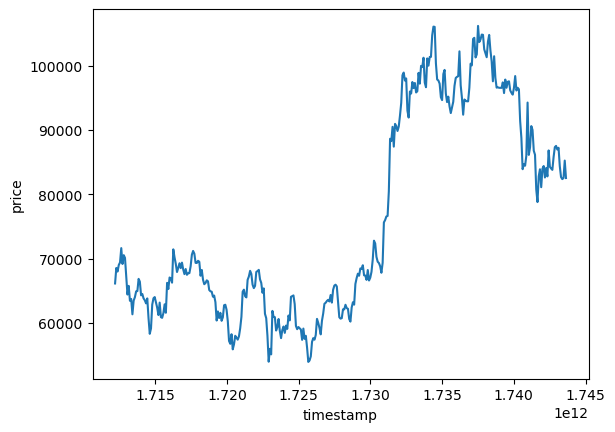

In [8]:
sns.lineplot(hist_data.price)

<Axes: ylabel='timestamp'>

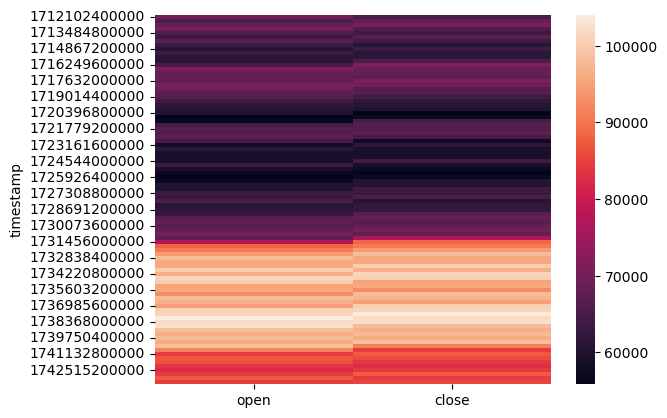

In [9]:
sns.heatmap(ohlc_data[['open', 'close']])
